In [47]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import hamming, jaccard
from collections import Counter

In [48]:
# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('../SCRM/data/supply_chain_data.csv')

# Display the first few rows of the DataFrame
print(df.head())

  Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai        29          

In [49]:
# Define the baseline supplier
baseline_supplier = 'Supplier 1'  # Replace with the actual baseline supplier name

# 0-1 Matrix 

In [50]:
# Define comparison functions for each feature
def compare_price(price):
    if(price < baseline_data['Price']):
        return 1
    else:
        return 0

def compare_availability(availability):
    if(availability > baseline_data['Availability']):
        return 1
    else:
        return 0

def compare_number_of_products_sold(number_of_products_sold):
    if(number_of_products_sold > baseline_data['Number of products sold']):
        return 1
    else:
        return 0

def compare_revenue_generated(revenue_generated):
    if(revenue_generated > baseline_data['Revenue generated']):
        return 1
    else:
        return 0

def compare_stock_levels(stock_levels):
    if(stock_levels > baseline_data['Stock levels']):
        return 1
    else:
        return 0

def compare_lead_times(lead_times):
    if(lead_times < baseline_data['Lead times']):
        return 1
    else:
        return 0

def compare_order_quantities(order_quantities):
    if(order_quantities > baseline_data['Order quantities']):
        return 1
    else:
        return 0

def compare_shipping_times(shipping_times):
    if(shipping_times < baseline_data['Shipping times']):
        return 1
    else:   
        return 0

def compare_shipping_costs(shipping_costs):
    if(shipping_costs < baseline_data['Shipping costs']):
        return 1
    else:
        return 0

def compare_production_volumes(production_volumes):
    if(production_volumes > baseline_data['Production volumes']):
        return 1
    else:
        return 0

def compare_manufacturing_lead_time(manufacturing_lead_time):
    if(manufacturing_lead_time < baseline_data['Manufacturing lead time']):
        return 1
    else:
        return 0

def compare_manufacturing_costs(manufacturing_costs):
    if(manufacturing_costs < baseline_data['Manufacturing costs']):
        return 1
    else:
        return 0

def compare_defect_rates(defect_rates):
    if(defect_rates < baseline_data['Defect rates']):
        return 1
    else:
        return 0

def compare_costs(costs):
    if(costs < baseline_data['Costs']):
        return 1
    else:
        return 0

In [51]:
# Create a dictionary of comparison functions
comparison_functions = {
    'Price': compare_price,
    'Availability': compare_availability,
    'Number of products sold': compare_number_of_products_sold,
    'Revenue generated': compare_revenue_generated,
    'Stock levels': compare_stock_levels,
    'Lead times': compare_lead_times,
    'Order quantities': compare_order_quantities,
    'Shipping times': compare_shipping_times,
    'Shipping costs': compare_shipping_costs,
    'Production volumes': compare_production_volumes,
    'Manufacturing lead time': compare_manufacturing_lead_time,
    'Manufacturing costs': compare_manufacturing_costs,
    'Defect rates': compare_defect_rates,
    'Costs': compare_costs
}

# Initialize an empty DataFrame for the comparison matrix
# comparison_matrix = pd.DataFrame(index=df['Supplier name'], columns=comparison_functions.keys())
comparison_matrix = pd.DataFrame(index=df['Supplier name'], columns=list(comparison_functions.keys()) + ['Distance'])

In [52]:
# Extract the baseline supplier's data
baseline_data = df[df['Supplier name'] == baseline_supplier].iloc[0]

In [53]:
#getting features of the baseline supplier
baseline_features = baseline_data[list(comparison_functions.keys())]

#saving the baseline features as a dataframe
baseline_features = pd.DataFrame(baseline_features).T

#into csv file
baseline_features.to_csv('../SCRM/data/baseline_features.csv', index=False)

In [54]:
# Fill the comparison matrix
for supplier in df['Supplier name']:
    if supplier == baseline_supplier:
        continue
    supplier_data = df[df['Supplier name'] == supplier].iloc[0]
    distance = 0
    for feature, compare_func in comparison_functions.items():
        comparison_value = compare_func(supplier_data[feature])
        comparison_matrix.at[supplier, feature] = comparison_value
        distance += comparison_value
    comparison_matrix.at[supplier, 'Distance'] = distance

In [55]:
comparison_matrix = comparison_matrix.drop(baseline_supplier, errors='ignore')
comparison_matrix.to_csv('../SCRM/data/comparison_matrix.csv')

# Display the comparison matrix
print(comparison_matrix)

              Price Availability Number of products sold Revenue generated  \
Supplier name                                                                
Supplier 3        0            1                       1                 0   
Supplier 3        0            1                       1                 0   
Supplier 5        0            1                       1                 0   
Supplier 4        1            1                       1                 0   
Supplier 3        0            1                       1                 0   
...             ...          ...                     ...               ...   
Supplier 4        1            1                       1                 0   
Supplier 3        0            1                       1                 0   
Supplier 4        1            1                       1                 0   
Supplier 5        0            1                       1                 0   
Supplier 2        0            1                       1        

In [56]:
# Define comparison functions
def ratio_comparison(value, baseline_value):
    return value / baseline_value

def difference_comparison(value, baseline_value):
    return value - baseline_value

def normalized_difference(value, baseline_value):
    return (value - baseline_value) / baseline_value

In [57]:
# Create a dictionary of comparison methods
comparison_methods = {
    'ratio': ratio_comparison,
    'difference': difference_comparison,
    'normalized_difference': normalized_difference
}

In [58]:
# Generalized comparison function
def generalized_comparison(value, baseline_value, method):
    return comparison_methods[method](value, baseline_value)

In [59]:
# Selected features for comparison and visualization
selected_features = [
    'Price', 'Availability', 'Number of products sold', 'Revenue generated',
    'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
    'Shipping costs', 'Production volumes', 'Manufacturing lead time',
    'Manufacturing costs', 'Defect rates', 'Costs'
]

In [60]:
# Update comparison functions to use the generalized comparison function
comparison_functions = {feature: lambda value, baseline_value: generalized_comparison(value, baseline_value, chosen_method) for feature in selected_features}

In [61]:
# Function to fill the comparison matrix
def fill_comparison_matrix(df, baseline_data, comparison_functions, chosen_method):
    comparison_matrix = pd.DataFrame(index=df['Supplier name'], columns=list(comparison_functions.keys()) + ['Distance'])
    
    for supplier in df['Supplier name']:
        supplier_data = df[df['Supplier name'] == supplier].iloc[0]
        distance = 0
        for feature, compare_func in comparison_functions.items():
            comparison_value = compare_func(supplier_data[feature], baseline_data[feature])
            comparison_matrix.at[supplier, feature] = comparison_value
            distance += abs(comparison_value)  # Use absolute value for distance calculation
        comparison_matrix.at[supplier, 'Distance'] = distance
    
    return comparison_matrix

In [62]:
# Choose a comparison method
chosen_method = 'ratio'  # Change to 'difference' or 'normalized_difference' as needed
ratio_comparison_matrix = fill_comparison_matrix(df, baseline_data, comparison_functions, chosen_method)
ratio_comparison_matrix = ratio_comparison_matrix.reset_index()
ratio_comparison_matrix.to_csv('../SCRM/data/comparison_matrix_ratio.csv')

print(comparison_matrix)

              Price Availability Number of products sold Revenue generated  \
Supplier name                                                                
Supplier 3        0            1                       1                 0   
Supplier 3        0            1                       1                 0   
Supplier 5        0            1                       1                 0   
Supplier 4        1            1                       1                 0   
Supplier 3        0            1                       1                 0   
...             ...          ...                     ...               ...   
Supplier 4        1            1                       1                 0   
Supplier 3        0            1                       1                 0   
Supplier 4        1            1                       1                 0   
Supplier 5        0            1                       1                 0   
Supplier 2        0            1                       1        

In [63]:
chosen_method = 'difference'  # Change to 'ratio' or 'normalized_difference' as needed
difference_comparison_matrix = fill_comparison_matrix(df, baseline_data, comparison_functions, chosen_method)
difference_comparison_matrix = difference_comparison_matrix.reset_index()
difference_comparison_matrix.to_csv('../SCRM/data/comparison_matrix_difference.csv')
print(difference_comparison_matrix)

   Supplier name      Price Availability Number of products sold  \
0     Supplier 3  58.488322           21                     794   
1     Supplier 3  58.488322           21                     794   
2     Supplier 1        0.0            0                       0   
3     Supplier 5   49.84366           34                      75   
4     Supplier 1        0.0            0                       0   
..           ...        ...          ...                     ...   
95    Supplier 4  -9.619707           53                     139   
96    Supplier 3  58.488322           21                     794   
97    Supplier 4  -9.619707           53                     139   
98    Supplier 5   49.84366           34                      75   
99    Supplier 2   52.69605            1                     972   

   Revenue generated Stock levels Lead times Order quantities Shipping times  \
0        -915.752833           57         -3                8              2   
1        -915.752833   

In [64]:
chosen_method = 'normalized_difference'  # Change to 'difference' or 'ratio' as needed
normal_diff_comparison_matrix = fill_comparison_matrix(df, baseline_data, comparison_functions, chosen_method)

normal_diff_comparison_matrix = normal_diff_comparison_matrix.reset_index()
normal_diff_comparison_matrix.to_csv('../SCRM/data/comparison_matrix_normalized_difference.csv')
print(normal_diff_comparison_matrix)

   Supplier name     Price Availability Number of products sold  \
0     Supplier 3  5.166957     0.617647                   99.25   
1     Supplier 3  5.166957     0.617647                   99.25   
2     Supplier 1       0.0          0.0                     0.0   
3     Supplier 5  4.403273          1.0                   9.375   
4     Supplier 1       0.0          0.0                     0.0   
..           ...       ...          ...                     ...   
95    Supplier 4 -0.849821     1.558824                  17.375   
96    Supplier 3  5.166957     0.617647                   99.25   
97    Supplier 4 -0.849821     1.558824                  17.375   
98    Supplier 5  4.403273          1.0                   9.375   
99    Supplier 2  4.655258     0.029412                   121.5   

   Revenue generated Stock levels Lead times Order quantities Shipping times  \
0          -0.095613         57.0       -0.3         0.090909            1.0   
1          -0.095613         57.0  

In [65]:
print(normal_diff_comparison_matrix.columns)

Index(['Supplier name', 'Price', 'Availability', 'Number of products sold',
       'Revenue generated', 'Stock levels', 'Lead times', 'Order quantities',
       'Shipping times', 'Shipping costs', 'Production volumes',
       'Manufacturing lead time', 'Manufacturing costs', 'Defect rates',
       'Costs', 'Distance'],
      dtype='object')


# CLustering

In [66]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
comparison_matrix = ratio_comparison_matrix # Can specify any type of comparision matrix here

In [68]:
print(comparison_matrix.columns)

Index(['Supplier name', 'Price', 'Availability', 'Number of products sold',
       'Revenue generated', 'Stock levels', 'Lead times', 'Order quantities',
       'Shipping times', 'Shipping costs', 'Production volumes',
       'Manufacturing lead time', 'Manufacturing costs', 'Defect rates',
       'Costs', 'Distance'],
      dtype='object')


In [69]:
# Preprocess: Standardize the comparison matrix (ignoring the 'Distance' column for now)
features = comparison_matrix.drop(columns=['Distance'])  # Drop the 'Distance' column
scaler = StandardScaler()

# supplier name is column make it index for it and remove the column
filtered_compared_matrix = comparison_matrix[comparison_matrix['Supplier name'] != baseline_supplier]
features = filtered_compared_matrix.drop(columns=['Distance'])
features.index = filtered_compared_matrix['Supplier name']
features = features.drop(columns=['Supplier name'])

features_scaled = scaler.fit_transform(features)

In [70]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # You can change the number of clusters (n_clusters)
filtered_compared_matrix['Cluster'] = kmeans.fit_predict(features_scaled)

/tmp/ipykernel_1421712/3092622046.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_compared_matrix['Cluster'] = kmeans.fit_predict(features_scaled)


In [71]:
#print the position of the centroids
print(kmeans.cluster_centers_)

[[ 0.44059681  0.40213162 -1.07959293  0.83800282 -0.68421697 -0.75179313
  -1.19310863  1.41791046 -1.20928967  0.86818253 -0.78235214 -1.48929039
   1.0543865  -0.58025223]
 [ 0.54509748 -1.27098596  1.15250662 -0.41061688 -0.97745282  0.88295704
   0.53586269 -1.24980768  1.35903856  0.93343718  0.32877055  0.16255678
   0.49020365  1.51935705]
 [-1.73791393  1.36544175 -0.92033499 -1.36763945  1.49876099  0.88295704
  -0.68882533 -0.18272042  0.07298114 -1.22247609 -1.00457668  1.34240584
  -0.1761705  -0.63496937]
 [ 0.75730424 -0.2569753   0.70957047  1.23780204  0.45614465 -1.45240035
   1.47238881  0.35082321 -0.62968631 -0.94388892  1.66211778 -0.06215516
  -1.77282455 -0.77012441]
 [ 0.54509748 -1.27098596  1.15250662 -0.41061688 -0.97745282  0.88295704
   0.53586269 -1.24980768  1.35903856  0.93343718  0.32877055  0.16255678
   0.49020365  1.51935705]]


In [72]:
# Calculate distance from each supplier to their cluster centroid
filtered_compared_matrix['Distance_to_Centroid'] = np.linalg.norm(features_scaled - kmeans.cluster_centers_[filtered_compared_matrix['Cluster']], axis=1)

/tmp/ipykernel_1421712/1062149702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_compared_matrix['Distance_to_Centroid'] = np.linalg.norm(features_scaled - kmeans.cluster_centers_[filtered_compared_matrix['Cluster']], axis=1)


In [73]:
# Analysis: Print the number of suppliers in each cluster
suppliers_in_clusters = filtered_compared_matrix['Cluster'].value_counts()
print("\nNumber of suppliers in each cluster:")
print(suppliers_in_clusters)


Number of suppliers in each cluster:
Cluster
1    21
2    18
0    18
3    15
4     1
Name: count, dtype: int64


In [74]:
print(filtered_compared_matrix.columns)

Index(['Supplier name', 'Price', 'Availability', 'Number of products sold',
       'Revenue generated', 'Stock levels', 'Lead times', 'Order quantities',
       'Shipping times', 'Shipping costs', 'Production volumes',
       'Manufacturing lead time', 'Manufacturing costs', 'Defect rates',
       'Costs', 'Distance', 'Cluster', 'Distance_to_Centroid'],
      dtype='object')


In [75]:
# Print distance from each supplier to its cluster centroid
print("\nDistance from each supplier to its cluster centroid:")
print(filtered_compared_matrix[['Supplier name', 'Cluster', 'Distance_to_Centroid']])


Distance from each supplier to its cluster centroid:
   Supplier name  Cluster  Distance_to_Centroid
0     Supplier 3        3          7.929793e-16
1     Supplier 3        3          7.929793e-16
3     Supplier 5        0          1.197035e-15
5     Supplier 4        2          9.774732e-16
6     Supplier 3        3          7.929793e-16
..           ...      ...                   ...
95    Supplier 4        2          9.774732e-16
96    Supplier 3        3          7.929793e-16
97    Supplier 4        2          9.774732e-16
98    Supplier 5        0          1.197035e-15
99    Supplier 2        4          9.840516e-16

[73 rows x 3 columns]


/tmp/ipykernel_1421712/1023529318.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=suppliers_in_clusters.index, y=suppliers_in_clusters.values, palette='coolwarm')


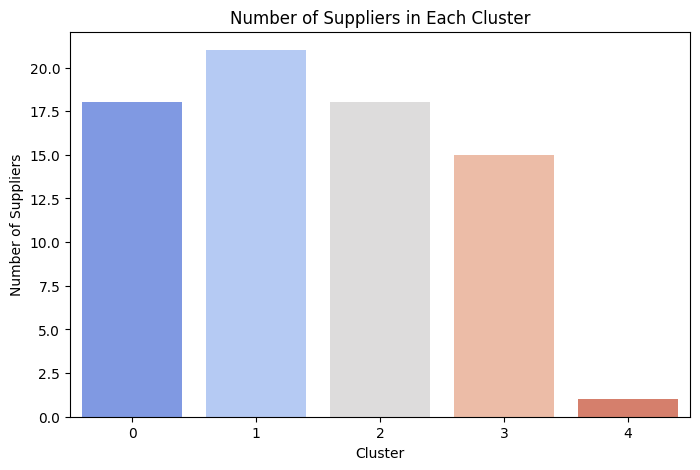

In [76]:
# Show a bar plot of the number of suppliers in each cluster
plt.figure(figsize=(8,5))
sns.barplot(x=suppliers_in_clusters.index, y=suppliers_in_clusters.values, palette='coolwarm')
plt.title('Number of Suppliers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Suppliers')
plt.show()

In [77]:
print(type(baseline_supplier))
print(baseline_supplier)


<class 'str'>
Supplier 1


# Using three metrics

In [78]:
def find_relative_cluster(base_supplier_features, centroids, scaler):
    # Normalize the base supplier features
    base_supplier_scaled = scaler.transform([base_supplier_features])
    
    def calculate_distances(metric):
        distances = []
        for idx, centroid in enumerate(centroids):
            centroid_scaled = scaler.transform([centroid])
            
            if metric == 'euclidean':
                distance = np.linalg.norm(base_supplier_scaled - centroid_scaled)
            
            elif metric == 'manhattan':
                distance = np.sum(np.abs(base_supplier_scaled - centroid_scaled))
            
            elif metric == 'cosine':
                distance = 1 - cosine_similarity(base_supplier_scaled, centroid_scaled)[0][0]
            
            else:
                raise ValueError(f"Unsupported metric: {metric}")
            
            distances.append((idx, distance))
        
        return distances
    
    # Calculate distances for each metric
    euclidean_distances = calculate_distances('euclidean')
    manhattan_distances = calculate_distances('manhattan')
    cosine_distances = calculate_distances('cosine')
    
    # Find the index of the relative cluster for each metric
    euclidean_cluster_index = max(euclidean_distances, key=lambda x: x[1])[0]
    manhattan_cluster_index = max(manhattan_distances, key=lambda x: x[1])[0]
    cosine_cluster_index = max(cosine_distances, key=lambda x: x[1])[0]
    
    # Determine the majority cluster index
    cluster_indices = [euclidean_cluster_index, manhattan_cluster_index, cosine_cluster_index]
    majority_cluster_index = Counter(cluster_indices).most_common(1)[0][0]
    
    return majority_cluster_index

# Using only one Metric

In [79]:
# def find_similar_cluster(base_supplier_features, centroids, scaler, metric='euclidean'):
#     # Normalize the base supplier features
#     base_supplier_scaled = scaler.transform([base_supplier_features])
    
#     distances = []
    
#     # Calculate the distance to each cluster centroid using the selected metric
#     for idx, centroid in enumerate(centroids):
#         centroid_scaled = scaler.transform([centroid])
        
#         if metric == 'euclidean':
#             distance = np.linalg.norm(base_supplier_scaled - centroid_scaled)
        
#         elif metric == 'manhattan':
#             distance = np.sum(np.abs(base_supplier_scaled - centroid_scaled))
        
#         elif metric == 'cosine':
#             distance = 1 - cosine_similarity(base_supplier_scaled, centroid_scaled)[0][0]
        
#         else:
#             raise ValueError(f"Unsupported metric: {metric}")
        
#         distances.append((idx, distance))
    
#     # Find the index of the farthest cluster based on the largest distance
#     farthest_cluster_index = max(distances, key=lambda x: x[1])
    
#     return farthest_cluster_index


In [80]:
# Using the majority cluster to find the relative cluster

centroids = kmeans.cluster_centers_  # Get the cluster centroids from your KMeans model
base_supplier_features = baseline_features[selected_features].values[0]

related_cluster = find_relative_cluster(base_supplier_features, centroids, scaler)
print(f"The relative cluster is Cluster {related_cluster}")


The relative cluster is Cluster 2


/data2/home/kpnaveen/anaconda3/envs/scrm/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/data2/home/kpnaveen/anaconda3/envs/scrm/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/data2/home/kpnaveen/anaconda3/envs/scrm/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/data2/home/kpnaveen/anaconda3/envs/scrm/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/data2/home/kpnaveen/anaconda3/envs/scrm/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted w

In [81]:
# Using the only metric to find the relative cluster

# Find the relative cluster using Euclidean distance
# related_cluster_euclidean = find_similar_cluster(base_supplier_features, centroids, scaler, metric='euclidean')
# print(f"The relative cluster using Euclidean distance is Cluster {related_cluster_euclidean[0]} with distance {related_cluster_euclidean[1]}")

# Find the relative cluster using Cosine distance
# related_cluster_cosine = find_similar_cluster(base_supplier_features, centroids, scaler, metric='cosine')
# print(f"The relative cluster using Cosine distance is Cluster {related_cluster_cosine[0]} with distance {related_cluster_cosine[1]}")

In [82]:
# # Find the relative cluster to the base supplier (where the supplier is not in any of the clusters)

# base_supplier_features = baseline_features[selected_features].values[0]
# base_supplier_scaled = scaler.transform([base_supplier_features])

# centroids = kmeans.cluster_centers_

# # Calculate the distance from the base supplier to each cluster centroid
# distances_to_centroids = np.linalg.norm(centroids - base_supplier_scaled, axis=1)
# print(distances_to_centroids)

# # Find the index of the relative centroid
# relative_cluster_index = np.argmin(distances_to_centroids)

# print(f"The relative cluster to the base supplier is Cluster {relative_cluster_index}")

In [83]:
related_cluster_index = related_cluster
# related_cluster_index = related_cluster_euclidean[0]

In [84]:
#find the suppliers in that cluster
related_cluster_suppliers = filtered_compared_matrix[filtered_compared_matrix['Cluster'] == related_cluster_index]
print("\nSuppliers in the related cluster:")
print(related_cluster_suppliers[['Supplier name', 'Cluster', 'Distance_to_Centroid']])


Suppliers in the related cluster:
   Supplier name  Cluster  Distance_to_Centroid
5     Supplier 4        2          9.774732e-16
7     Supplier 4        2          9.774732e-16
8     Supplier 4        2          9.774732e-16
12    Supplier 4        2          9.774732e-16
19    Supplier 4        2          9.774732e-16
22    Supplier 4        2          9.774732e-16
25    Supplier 4        2          9.774732e-16
30    Supplier 4        2          9.774732e-16
41    Supplier 4        2          9.774732e-16
60    Supplier 4        2          9.774732e-16
61    Supplier 4        2          9.774732e-16
69    Supplier 4        2          9.774732e-16
73    Supplier 4        2          9.774732e-16
74    Supplier 4        2          9.774732e-16
91    Supplier 4        2          9.774732e-16
93    Supplier 4        2          9.774732e-16
95    Supplier 4        2          9.774732e-16
97    Supplier 4        2          9.774732e-16


In [85]:
# Assign a new cluster number for the base supplier
base_supplier_cluster = max(filtered_compared_matrix['Cluster']) + 1
# BEGIN: Add cluster column to the dataframe
# Assign the cluster for the baseline supplier
df.loc[df['Supplier name'] == baseline_supplier, 'Cluster'] = base_supplier_cluster

# Assign the cluster for the remaining suppliers based on the filtered comparison matrix
for supplier in filtered_compared_matrix['Supplier name']:
    cluster = filtered_compared_matrix.loc[filtered_compared_matrix['Supplier name'] == supplier, 'Cluster'].values[0]
    df.loc[df['Supplier name'] == supplier, 'Cluster'] = cluster
# END: Add cluster column to the dataframe


In [86]:
df

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs,Cluster
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075,3.0
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579,3.0
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282,5.0
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159,0.0
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241,2.0
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141,3.0
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423,2.0
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864,0.0


# Testing

In [87]:
def assign_to_cluster(test_features, centroids, scaler,test_baseline_features):
    # Normalize test features
    normalized_test_features = scaler.transform([test_baseline_features])

    # Calculate distances for each metric
    euclidean_distances = np.linalg.norm(centroids - normalized_test_features, axis=1)
    manhattan_distances = np.sum(np.abs(centroids - normalized_test_features), axis=1)
    cosine_distances = 1 - cosine_similarity(centroids, normalized_test_features).flatten()

    # Find the index of the relative cluster for each metric
    euclidean_cluster_index = np.argmax(euclidean_distances)
    manhattan_cluster_index = np.argmax(manhattan_distances)
    cosine_cluster_index = np.argmax(cosine_distances)

    # Determine the majority cluster index
    cluster_indices = [euclidean_cluster_index, manhattan_cluster_index, cosine_cluster_index]
    majority_cluster_index = Counter(cluster_indices).most_common(1)[0][0]


    # Calculate Euclidean distance to each centroid
    # distances = np.linalg.norm(centroids - normalized_test_features, axis=1)
    
    # Find the index of the related centroid
    # relative_cluster = np.argmax(distances)
    
    return majority_cluster_index


def rank_suppliers_in_cluster(df, test_features, test_cluster, scaler, metric='euclidean', weights=None, covariance_matrix=None):
    """
    Ranks suppliers in the same cluster as the test supplier based on different metrics.
    
    Args:
    df: DataFrame containing supplier data.
    test_features: Features of the test supplier.
    test_cluster: Cluster number for the test supplier.
    scaler: Scaler object to normalize features.
    metric: The metric to use for comparison ('euclidean', 'manhattan', 'cosine', 'jaccard', 'hamming', 'weighted_euclidean', 'mahalanobis').
    weights: Optional weights for weighted Euclidean distance.
    covariance_matrix: Optional covariance matrix for Mahalanobis distance.
    
    Returns:
    List of suppliers sorted by distance/similarity.
    """
    
    # Filter suppliers in the relative cluster
    suppliers_in_cluster = df[df['Cluster'] == test_cluster]
    
    # Normalize the test features
    normalized_test_features = scaler.transform([test_features])
    
    distances = []
    for idx, row in suppliers_in_cluster.iterrows():
        supplier_features = row[selected_features].values
        normalized_supplier_features = scaler.transform([supplier_features])
        
        if metric == 'euclidean':
            # Euclidean Distance
            distance = np.linalg.norm(normalized_test_features - normalized_supplier_features)
        
        elif metric == 'manhattan':
            # Manhattan Distance
            distance = np.sum(np.abs(normalized_test_features - normalized_supplier_features))
        
        elif metric == 'cosine':
            # Cosine Similarity (convert to distance)
            distance = 1 - cosine_similarity(normalized_test_features, normalized_supplier_features)[0][0]
        
        elif metric == 'jaccard':
            # Jaccard Similarity (for binary/categorical features)
            distance = 1 - jaccard(normalized_test_features.flatten(), normalized_supplier_features.flatten())
        
        elif metric == 'hamming':
            # Hamming Distance (for categorical features)
            distance = hamming(normalized_test_features.flatten(), normalized_supplier_features.flatten())
        
        elif metric == 'weighted_euclidean' and weights is not None:
            # Weighted Euclidean Distance
            distance = np.sqrt(np.sum(weights * (normalized_test_features - normalized_supplier_features) ** 2))
        
        elif metric == 'mahalanobis' and covariance_matrix is not None:
            # Mahalanobis Distance
            delta = normalized_test_features - normalized_supplier_features
            distance = np.sqrt(np.dot(np.dot(delta, np.linalg.inv(covariance_matrix)), delta.T).flatten()[0])
        
        else:
            raise ValueError(f"Unsupported metric: {metric}")
        
        distances.append((row['Supplier name'], distance))
    
    # Sort suppliers by distance/similarity
    distances.sort(key=lambda x: x[1], reverse=True)
    
    return distances

In [88]:
# Example test features (replace with actual test data)
test_features = [50, 70, 500, 20000, 80, 10, 100, 5, 10, 100, 30, 5, 0.1, 100]

# Find the related cluster for the test supplier
test_baseline_supplier = 'Supplier 2'  # Replace with the actual test supplier name

# Extract the baseline supplier's data
test_baseline_data = df[df['Supplier name'] == test_baseline_supplier].iloc[0]

#getting features of the baseline supplier
test_baseline_features = test_baseline_data[list(comparison_functions.keys())]

In [89]:
original_features = df[selected_features]
print("original features:",original_features)

original features:         Price  Availability  Number of products sold  Revenue generated  \
0   69.808006            55                      802        8661.996792   
1   14.843523            95                      736        7460.900065   
2   11.319683            34                        8        9577.749626   
3   61.163343            68                       83        7766.836426   
4    4.805496            26                      871        2686.505152   
..        ...           ...                      ...                ...   
95  77.903927            65                      672        7386.363944   
96  24.423131            29                      324        7698.424766   
97   3.526111            56                       62        4370.916580   
98  19.754605            43                      913        8525.952560   
99  68.517833            17                      627        9185.185829   

    Stock levels  Lead times  Order quantities  Shipping times  \
0             

In [90]:
# Step 1: Cluster the original data
scaler_original = StandardScaler()
original_features_scaled = scaler_original.fit_transform(original_features)


kmeans_original = KMeans(n_clusters=5, random_state=42)  # You can change the number of clusters (n_clusters)
df['Original_Cluster'] = kmeans_original.fit_predict(original_features_scaled)

#  Step 2: Assign the test supplier to a cluster base on base line supplier
test_centroids = kmeans_original.cluster_centers_

test_cluster = assign_to_cluster(test_features, test_centroids, scaler,test_baseline_features)
print(f"The test supplier related to Cluster {test_cluster}")

The test supplier related to Cluster 3


/data2/home/kpnaveen/anaconda3/envs/scrm/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [91]:

# Step 3: Rank the suppliers within the relative cluster in the original data
ranked_suppliers_original = rank_suppliers_in_cluster(df, test_features, test_cluster, scaler_original, metric='euclidean')

print("Ranked suppliers in the original data based on similarity to the baseline supplier:")
for supplier, distance in ranked_suppliers_original:
    print(f"{supplier} - Distance: {distance}")

Ranked suppliers in the original data based on similarity to the baseline supplier:
Supplier 3 - Distance: 9.457225944335569
Supplier 3 - Distance: 9.450188094409144
Supplier 3 - Distance: 8.930141235477024
Supplier 3 - Distance: 8.720178995699676
Supplier 3 - Distance: 8.559397256614098
Supplier 3 - Distance: 8.344140086295225
Supplier 3 - Distance: 7.824583196771372
Supplier 3 - Distance: 7.462175925080948
Supplier 3 - Distance: 7.301239507439761
Supplier 3 - Distance: 6.996754998029455
Supplier 3 - Distance: 6.938324152590352
Supplier 3 - Distance: 6.777374818151578
Supplier 3 - Distance: 6.5327508579866915
Supplier 3 - Distance: 6.378411020987188
Supplier 3 - Distance: 5.414212007916716


/data2/home/kpnaveen/anaconda3/envs/scrm/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/data2/home/kpnaveen/anaconda3/envs/scrm/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/data2/home/kpnaveen/anaconda3/envs/scrm/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/data2/home/kpnaveen/anaconda3/envs/scrm/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/data2/home/kpnaveen/anaconda3/envs/scrm/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted w

In [92]:
# Access data for Supplier 4, Supplier 3, and Supplier 1 in the original data for selected features
suppliers_to_access = ['Supplier 4', 'Supplier 3', 'Supplier 1']
suppliers_data = df[df['Supplier name'].isin(suppliers_to_access)][['Supplier name'] + selected_features]

# Save the accessed data to a CSV file
suppliers_data.to_csv('../SCRM/data/suppliers_data.csv', index=False)


In [93]:
# Rank suppliers in the related cluster
ranked_suppliers = rank_suppliers_in_cluster(df, test_features, test_cluster, scaler, metric='jaccard')
print("Ranked suppliers based on similarity to the test supplier:")
for supplier, distance in ranked_suppliers:
    print(f"{supplier} - Distance: {distance}")

Ranked suppliers based on similarity to the test supplier:
Supplier 3 - Distance: 0.0714285714285714
Supplier 3 - Distance: 0.0714285714285714
Supplier 3 - Distance: 0.0
Supplier 3 - Distance: 0.0
Supplier 3 - Distance: 0.0
Supplier 3 - Distance: 0.0
Supplier 3 - Distance: 0.0
Supplier 3 - Distance: 0.0
Supplier 3 - Distance: 0.0
Supplier 3 - Distance: 0.0
Supplier 3 - Distance: 0.0
Supplier 3 - Distance: 0.0
Supplier 3 - Distance: 0.0
Supplier 3 - Distance: 0.0
Supplier 3 - Distance: 0.0


/data2/home/kpnaveen/anaconda3/envs/scrm/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/data2/home/kpnaveen/anaconda3/envs/scrm/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/data2/home/kpnaveen/anaconda3/envs/scrm/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/data2/home/kpnaveen/anaconda3/envs/scrm/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/data2/home/kpnaveen/anaconda3/envs/scrm/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted w